# SVM - NSL

In [1]:
cd C:\\Users\\Sharuka Thirimanne\\Desktop\\FYP-ML-IDS

C:\Users\Sharuka Thirimanne\Desktop\FYP-ML-IDS


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
def load_train_dataset():
    df_train = pd.read_csv('NSL_train-set.csv')

    limit = df_train.shape[1]-1
    
    X_train = df_train.iloc[:,0:limit]
    Y_train = df_train.iloc[:,limit]
    
    return X_train, Y_train, df_train

X_train, Y_train, df_train = load_train_dataset()

In [4]:
def load_test_dataset():
    df_test = pd.read_csv('NSL_test-set.csv')

    limit = df_test.shape[1]-1
    
    X_test = df_test.iloc[:,0:limit]
    Y_test = df_test.iloc[:,limit]
    
    return X_test, Y_test, df_test

X_test, Y_test, df_test = load_test_dataset()

In [6]:
X_train, X_val , Y_train , Y_val = train_test_split(X_train,Y_train, test_size=0.065,stratify = Y_train,shuffle=True,random_state=42)

print('Training X   :',X_train.shape)
print('Validation X :',X_val.shape)
print('Test_X       :',X_test.shape)
print('Training_Y   :',Y_train.shape)
print('Validation Y :',Y_val.shape)
print('Test_Y       :',Y_test.shape)

Training X   : (99854, 62)
Validation X : (6942, 62)
Test_X       : (22310, 62)
Training_Y   : (99854,)
Validation Y : (6942,)
Test_Y       : (22310,)


In [ ]:
model = SVC(C= 63, gamma= 0.6).fit(X_train,Y_train)

In [ ]:
model_poly = SVC(C= 9, kernel= 'poly',degree=4,gamma=0.45).fit(X_train,Y_train)

## RBF Kernel Pipeline

In [ ]:
test_predictions = model.predict(X_test)

print('RBF Kernel')
print("Cross-Validation set accuracy: {:.6f} %".format((cross_val_score(model, X_train, Y_train, 
                                                                        cv=5,scoring='accuracy').mean())*100))
print("Train set accuracy           : {:.6f} %".format(model.score(X_train,Y_train)*100))
print("Test set accuracy            : {:.6f} %".format(accuracy_score(Y_test, test_predictions)*100))
#print("Test set accuracy            : {:.6f} %".format(pipe_rbf.score(X_test, Y_test)*100))

## Poly Kernel Pipeline

In [ ]:
test_predictions_poly = model_poly.predict(X_test)

print('Poly Kernel')
print("Cross-Validation set accuracy: {:.6f} %".format((cross_val_score(model_poly, X_train, Y_train, 
                                                                        cv=5,scoring='accuracy').mean())*100))
print("Train set accuracy           : {:.6f} %".format(model_poly.score(X_train,Y_train)*100))
print("Test set accuracy            : {:.6f} %".format(accuracy_score(Y_test, test_predictions_poly)*100))
#print("Test set accuracy            : {:.6f} %".format(pipe_poly.score(X_test, Y_test)*100))

In [1]:
param_grid = [
    {'gamma' : [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75],
     'C' : list(range(1,50,2))
    },
]

optimal_params = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    scoring ='accuracy',
    cv=2,
    verbose = 2
)

optimal_params.fit(X_train,Y_train)
print(optimal_params.best_params_)

NameError: name 'GridSearchCV' is not defined

In [24]:
param_grid = [
    {'gamma' : [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75],
     'C' : list(range(1,100,2)),
     'degree' : [2,3,4]
    },
]

optimal_params = GridSearchCV(
    estimator = model_poly,
    param_grid = param_grid,
    scoring ='accuracy',
    cv=2,
    verbose = 2
)

optimal_params.fit(X_val,Y_val)
print(optimal_params.best_params_)

Fitting 2 folds for each of 2100 candidates, totalling 4200 fits
[CV] C=1, degree=2, gamma=0.1 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................... C=1, degree=2, gamma=0.1, total=   0.3s
[CV] C=1, degree=2, gamma=0.1 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ......................... C=1, degree=2, gamma=0.1, total=   0.2s
[CV] C=1, degree=2, gamma=0.15 .......................................
[CV] ........................ C=1, degree=2, gamma=0.15, total=   0.2s
[CV] C=1, degree=2, gamma=0.15 .......................................
[CV] ........................ C=1, degree=2, gamma=0.15, total=   0.4s
[CV] C=1, degree=2, gamma=0.2 ........................................
[CV] ......................... C=1, degree=2, gamma=0.2, total=   0.2s
[CV] C=1, degree=2, gamma=0.2 ........................................
[CV] ......................... C=1, degree=2, gamma=0.2, total=   0.2s
[CV] C=1, degree=2, gamma=0.25 .......................................
[CV] ........................ C=1, degree=2, gamma=0.25, total=   0.2s
[CV] C=1, degree=2, gamma=0.25 .......................................
[CV] ........................ C=1, degree=2, gamma=0.25, total=   0.2s
[CV] C=1, degree=2, gamma=0.3 ........................................
[CV] .

[CV] ........................ C=1, degree=4, gamma=0.15, total=   0.2s
[CV] C=1, degree=4, gamma=0.2 ........................................
[CV] ......................... C=1, degree=4, gamma=0.2, total=   0.2s
[CV] C=1, degree=4, gamma=0.2 ........................................
[CV] ......................... C=1, degree=4, gamma=0.2, total=   0.2s
[CV] C=1, degree=4, gamma=0.25 .......................................
[CV] ........................ C=1, degree=4, gamma=0.25, total=   0.2s
[CV] C=1, degree=4, gamma=0.25 .......................................
[CV] ........................ C=1, degree=4, gamma=0.25, total=   0.2s
[CV] C=1, degree=4, gamma=0.3 ........................................
[CV] ......................... C=1, degree=4, gamma=0.3, total=   0.2s
[CV] C=1, degree=4, gamma=0.3 ........................................
[CV] ......................... C=1, degree=4, gamma=0.3, total=   0.2s
[CV] C=1, degree=4, gamma=0.35 .......................................
[CV] .

[CV] ......................... C=3, degree=3, gamma=0.2, total=   0.5s
[CV] C=3, degree=3, gamma=0.25 .......................................
[CV] ........................ C=3, degree=3, gamma=0.25, total=   0.4s
[CV] C=3, degree=3, gamma=0.25 .......................................
[CV] ........................ C=3, degree=3, gamma=0.25, total=   0.4s
[CV] C=3, degree=3, gamma=0.3 ........................................
[CV] ......................... C=3, degree=3, gamma=0.3, total=   0.3s
[CV] C=3, degree=3, gamma=0.3 ........................................
[CV] ......................... C=3, degree=3, gamma=0.3, total=   0.3s
[CV] C=3, degree=3, gamma=0.35 .......................................
[CV] ........................ C=3, degree=3, gamma=0.35, total=   0.3s
[CV] C=3, degree=3, gamma=0.35 .......................................
[CV] ........................ C=3, degree=3, gamma=0.35, total=   0.4s
[CV] C=3, degree=3, gamma=0.4 ........................................
[CV] .

[CV] ........................ C=5, degree=2, gamma=0.25, total=   0.2s
[CV] C=5, degree=2, gamma=0.3 ........................................
[CV] ......................... C=5, degree=2, gamma=0.3, total=   0.2s
[CV] C=5, degree=2, gamma=0.3 ........................................
[CV] ......................... C=5, degree=2, gamma=0.3, total=   0.2s
[CV] C=5, degree=2, gamma=0.35 .......................................
[CV] ........................ C=5, degree=2, gamma=0.35, total=   0.2s
[CV] C=5, degree=2, gamma=0.35 .......................................
[CV] ........................ C=5, degree=2, gamma=0.35, total=   0.2s
[CV] C=5, degree=2, gamma=0.4 ........................................
[CV] ......................... C=5, degree=2, gamma=0.4, total=   0.2s
[CV] C=5, degree=2, gamma=0.4 ........................................
[CV] ......................... C=5, degree=2, gamma=0.4, total=   0.2s
[CV] C=5, degree=2, gamma=0.45 .......................................
[CV] .

[CV] ......................... C=5, degree=4, gamma=0.3, total=   0.2s
[CV] C=5, degree=4, gamma=0.35 .......................................
[CV] ........................ C=5, degree=4, gamma=0.35, total=   0.2s
[CV] C=5, degree=4, gamma=0.35 .......................................
[CV] ........................ C=5, degree=4, gamma=0.35, total=   0.2s
[CV] C=5, degree=4, gamma=0.4 ........................................
[CV] ......................... C=5, degree=4, gamma=0.4, total=   0.1s
[CV] C=5, degree=4, gamma=0.4 ........................................
[CV] ......................... C=5, degree=4, gamma=0.4, total=   0.2s
[CV] C=5, degree=4, gamma=0.45 .......................................
[CV] ........................ C=5, degree=4, gamma=0.45, total=   0.1s
[CV] C=5, degree=4, gamma=0.45 .......................................
[CV] ........................ C=5, degree=4, gamma=0.45, total=   0.2s
[CV] C=5, degree=4, gamma=0.5 ........................................
[CV] .

[CV] ........................ C=7, degree=3, gamma=0.35, total=   0.2s
[CV] C=7, degree=3, gamma=0.4 ........................................
[CV] ......................... C=7, degree=3, gamma=0.4, total=   0.2s
[CV] C=7, degree=3, gamma=0.4 ........................................
[CV] ......................... C=7, degree=3, gamma=0.4, total=   0.2s
[CV] C=7, degree=3, gamma=0.45 .......................................
[CV] ........................ C=7, degree=3, gamma=0.45, total=   0.2s
[CV] C=7, degree=3, gamma=0.45 .......................................
[CV] ........................ C=7, degree=3, gamma=0.45, total=   0.2s
[CV] C=7, degree=3, gamma=0.5 ........................................
[CV] ......................... C=7, degree=3, gamma=0.5, total=   0.2s
[CV] C=7, degree=3, gamma=0.5 ........................................
[CV] ......................... C=7, degree=3, gamma=0.5, total=   0.2s
[CV] C=7, degree=3, gamma=0.55 .......................................
[CV] .

[CV] ......................... C=9, degree=2, gamma=0.4, total=   0.3s
[CV] C=9, degree=2, gamma=0.45 .......................................
[CV] ........................ C=9, degree=2, gamma=0.45, total=   0.3s
[CV] C=9, degree=2, gamma=0.45 .......................................
[CV] ........................ C=9, degree=2, gamma=0.45, total=   0.3s
[CV] C=9, degree=2, gamma=0.5 ........................................
[CV] ......................... C=9, degree=2, gamma=0.5, total=   0.3s
[CV] C=9, degree=2, gamma=0.5 ........................................
[CV] ......................... C=9, degree=2, gamma=0.5, total=   0.3s
[CV] C=9, degree=2, gamma=0.55 .......................................
[CV] ........................ C=9, degree=2, gamma=0.55, total=   0.4s
[CV] C=9, degree=2, gamma=0.55 .......................................
[CV] ........................ C=9, degree=2, gamma=0.55, total=   0.4s
[CV] C=9, degree=2, gamma=0.6 ........................................
[CV] .

[CV] ........................ C=9, degree=4, gamma=0.45, total=   0.2s
[CV] C=9, degree=4, gamma=0.5 ........................................
[CV] ......................... C=9, degree=4, gamma=0.5, total=   0.2s
[CV] C=9, degree=4, gamma=0.5 ........................................
[CV] ......................... C=9, degree=4, gamma=0.5, total=   0.2s
[CV] C=9, degree=4, gamma=0.55 .......................................
[CV] ........................ C=9, degree=4, gamma=0.55, total=   0.2s
[CV] C=9, degree=4, gamma=0.55 .......................................
[CV] ........................ C=9, degree=4, gamma=0.55, total=   0.2s
[CV] C=9, degree=4, gamma=0.6 ........................................
[CV] ......................... C=9, degree=4, gamma=0.6, total=   0.2s
[CV] C=9, degree=4, gamma=0.6 ........................................
[CV] ......................... C=9, degree=4, gamma=0.6, total=   0.2s
[CV] C=9, degree=4, gamma=0.65 .......................................
[CV] .

[CV] ....................... C=11, degree=3, gamma=0.55, total=   0.2s
[CV] C=11, degree=3, gamma=0.55 ......................................
[CV] ....................... C=11, degree=3, gamma=0.55, total=   0.2s
[CV] C=11, degree=3, gamma=0.6 .......................................
[CV] ........................ C=11, degree=3, gamma=0.6, total=   0.2s
[CV] C=11, degree=3, gamma=0.6 .......................................
[CV] ........................ C=11, degree=3, gamma=0.6, total=   0.2s
[CV] C=11, degree=3, gamma=0.65 ......................................
[CV] ....................... C=11, degree=3, gamma=0.65, total=   0.2s
[CV] C=11, degree=3, gamma=0.65 ......................................
[CV] ....................... C=11, degree=3, gamma=0.65, total=   0.2s
[CV] C=11, degree=3, gamma=0.7 .......................................
[CV] ........................ C=11, degree=3, gamma=0.7, total=   0.2s
[CV] C=11, degree=3, gamma=0.7 .......................................
[CV] .

[CV] ........................ C=13, degree=2, gamma=0.6, total=   0.2s
[CV] C=13, degree=2, gamma=0.6 .......................................
[CV] ........................ C=13, degree=2, gamma=0.6, total=   0.4s
[CV] C=13, degree=2, gamma=0.65 ......................................
[CV] ....................... C=13, degree=2, gamma=0.65, total=   0.4s
[CV] C=13, degree=2, gamma=0.65 ......................................
[CV] ....................... C=13, degree=2, gamma=0.65, total=   0.3s
[CV] C=13, degree=2, gamma=0.7 .......................................
[CV] ........................ C=13, degree=2, gamma=0.7, total=   0.3s
[CV] C=13, degree=2, gamma=0.7 .......................................
[CV] ........................ C=13, degree=2, gamma=0.7, total=   0.4s
[CV] C=13, degree=2, gamma=0.75 ......................................
[CV] ....................... C=13, degree=2, gamma=0.75, total=   0.3s
[CV] C=13, degree=2, gamma=0.75 ......................................
[CV] .

[CV] ....................... C=13, degree=4, gamma=0.65, total=   0.2s
[CV] C=13, degree=4, gamma=0.65 ......................................
[CV] ....................... C=13, degree=4, gamma=0.65, total=   0.2s
[CV] C=13, degree=4, gamma=0.7 .......................................
[CV] ........................ C=13, degree=4, gamma=0.7, total=   0.2s
[CV] C=13, degree=4, gamma=0.7 .......................................
[CV] ........................ C=13, degree=4, gamma=0.7, total=   0.2s
[CV] C=13, degree=4, gamma=0.75 ......................................
[CV] ....................... C=13, degree=4, gamma=0.75, total=   0.3s
[CV] C=13, degree=4, gamma=0.75 ......................................
[CV] ....................... C=13, degree=4, gamma=0.75, total=   0.4s
[CV] C=15, degree=2, gamma=0.1 .......................................
[CV] ........................ C=15, degree=2, gamma=0.1, total=   0.4s
[CV] C=15, degree=2, gamma=0.1 .......................................
[CV] .

[CV] ........................ C=15, degree=3, gamma=0.7, total=   0.2s
[CV] C=15, degree=3, gamma=0.7 .......................................
[CV] ........................ C=15, degree=3, gamma=0.7, total=   0.2s
[CV] C=15, degree=3, gamma=0.75 ......................................
[CV] ....................... C=15, degree=3, gamma=0.75, total=   0.2s
[CV] C=15, degree=3, gamma=0.75 ......................................
[CV] ....................... C=15, degree=3, gamma=0.75, total=   0.2s
[CV] C=15, degree=4, gamma=0.1 .......................................
[CV] ........................ C=15, degree=4, gamma=0.1, total=   0.2s
[CV] C=15, degree=4, gamma=0.1 .......................................
[CV] ........................ C=15, degree=4, gamma=0.1, total=   0.2s
[CV] C=15, degree=4, gamma=0.15 ......................................
[CV] ....................... C=15, degree=4, gamma=0.15, total=   0.2s
[CV] C=15, degree=4, gamma=0.15 ......................................
[CV] .

[CV] ....................... C=17, degree=2, gamma=0.75, total=   0.2s
[CV] C=17, degree=2, gamma=0.75 ......................................
[CV] ....................... C=17, degree=2, gamma=0.75, total=   0.2s
[CV] C=17, degree=3, gamma=0.1 .......................................
[CV] ........................ C=17, degree=3, gamma=0.1, total=   0.2s
[CV] C=17, degree=3, gamma=0.1 .......................................
[CV] ........................ C=17, degree=3, gamma=0.1, total=   0.2s
[CV] C=17, degree=3, gamma=0.15 ......................................
[CV] ....................... C=17, degree=3, gamma=0.15, total=   0.2s
[CV] C=17, degree=3, gamma=0.15 ......................................
[CV] ....................... C=17, degree=3, gamma=0.15, total=   0.2s
[CV] C=17, degree=3, gamma=0.2 .......................................
[CV] ........................ C=17, degree=3, gamma=0.2, total=   0.2s
[CV] C=17, degree=3, gamma=0.2 .......................................
[CV] .

[CV] ........................ C=19, degree=2, gamma=0.1, total=   0.2s
[CV] C=19, degree=2, gamma=0.1 .......................................
[CV] ........................ C=19, degree=2, gamma=0.1, total=   0.2s
[CV] C=19, degree=2, gamma=0.15 ......................................
[CV] ....................... C=19, degree=2, gamma=0.15, total=   0.2s
[CV] C=19, degree=2, gamma=0.15 ......................................
[CV] ....................... C=19, degree=2, gamma=0.15, total=   0.2s
[CV] C=19, degree=2, gamma=0.2 .......................................
[CV] ........................ C=19, degree=2, gamma=0.2, total=   0.2s
[CV] C=19, degree=2, gamma=0.2 .......................................
[CV] ........................ C=19, degree=2, gamma=0.2, total=   0.2s
[CV] C=19, degree=2, gamma=0.25 ......................................
[CV] ....................... C=19, degree=2, gamma=0.25, total=   0.2s
[CV] C=19, degree=2, gamma=0.25 ......................................
[CV] .

[CV] ....................... C=19, degree=4, gamma=0.15, total=   0.2s
[CV] C=19, degree=4, gamma=0.2 .......................................
[CV] ........................ C=19, degree=4, gamma=0.2, total=   0.2s
[CV] C=19, degree=4, gamma=0.2 .......................................
[CV] ........................ C=19, degree=4, gamma=0.2, total=   0.2s
[CV] C=19, degree=4, gamma=0.25 ......................................
[CV] ....................... C=19, degree=4, gamma=0.25, total=   0.2s
[CV] C=19, degree=4, gamma=0.25 ......................................
[CV] ....................... C=19, degree=4, gamma=0.25, total=   0.2s
[CV] C=19, degree=4, gamma=0.3 .......................................
[CV] ........................ C=19, degree=4, gamma=0.3, total=   0.2s
[CV] C=19, degree=4, gamma=0.3 .......................................
[CV] ........................ C=19, degree=4, gamma=0.3, total=   0.2s
[CV] C=19, degree=4, gamma=0.35 ......................................
[CV] .

[CV] ........................ C=21, degree=3, gamma=0.2, total=   0.2s
[CV] C=21, degree=3, gamma=0.25 ......................................
[CV] ....................... C=21, degree=3, gamma=0.25, total=   0.2s
[CV] C=21, degree=3, gamma=0.25 ......................................
[CV] ....................... C=21, degree=3, gamma=0.25, total=   0.2s
[CV] C=21, degree=3, gamma=0.3 .......................................
[CV] ........................ C=21, degree=3, gamma=0.3, total=   0.2s
[CV] C=21, degree=3, gamma=0.3 .......................................
[CV] ........................ C=21, degree=3, gamma=0.3, total=   0.2s
[CV] C=21, degree=3, gamma=0.35 ......................................
[CV] ....................... C=21, degree=3, gamma=0.35, total=   0.2s
[CV] C=21, degree=3, gamma=0.35 ......................................
[CV] ....................... C=21, degree=3, gamma=0.35, total=   0.2s
[CV] C=21, degree=3, gamma=0.4 .......................................
[CV] .

[CV] ....................... C=23, degree=2, gamma=0.25, total=   0.3s
[CV] C=23, degree=2, gamma=0.3 .......................................
[CV] ........................ C=23, degree=2, gamma=0.3, total=   0.3s
[CV] C=23, degree=2, gamma=0.3 .......................................
[CV] ........................ C=23, degree=2, gamma=0.3, total=   0.3s
[CV] C=23, degree=2, gamma=0.35 ......................................
[CV] ....................... C=23, degree=2, gamma=0.35, total=   0.3s
[CV] C=23, degree=2, gamma=0.35 ......................................
[CV] ....................... C=23, degree=2, gamma=0.35, total=   0.3s
[CV] C=23, degree=2, gamma=0.4 .......................................
[CV] ........................ C=23, degree=2, gamma=0.4, total=   0.2s
[CV] C=23, degree=2, gamma=0.4 .......................................
[CV] ........................ C=23, degree=2, gamma=0.4, total=   0.3s
[CV] C=23, degree=2, gamma=0.45 ......................................
[CV] .

[CV] ....................... C=23, degree=4, gamma=0.35, total=   0.2s
[CV] C=23, degree=4, gamma=0.35 ......................................
[CV] ....................... C=23, degree=4, gamma=0.35, total=   0.2s
[CV] C=23, degree=4, gamma=0.4 .......................................
[CV] ........................ C=23, degree=4, gamma=0.4, total=   0.2s
[CV] C=23, degree=4, gamma=0.4 .......................................
[CV] ........................ C=23, degree=4, gamma=0.4, total=   0.2s
[CV] C=23, degree=4, gamma=0.45 ......................................
[CV] ....................... C=23, degree=4, gamma=0.45, total=   0.2s
[CV] C=23, degree=4, gamma=0.45 ......................................
[CV] ....................... C=23, degree=4, gamma=0.45, total=   0.2s
[CV] C=23, degree=4, gamma=0.5 .......................................
[CV] ........................ C=23, degree=4, gamma=0.5, total=   0.2s
[CV] C=23, degree=4, gamma=0.5 .......................................
[CV] .

[CV] ........................ C=25, degree=3, gamma=0.4, total=   0.4s
[CV] C=25, degree=3, gamma=0.4 .......................................
[CV] ........................ C=25, degree=3, gamma=0.4, total=   0.3s
[CV] C=25, degree=3, gamma=0.45 ......................................
[CV] ....................... C=25, degree=3, gamma=0.45, total=   0.4s
[CV] C=25, degree=3, gamma=0.45 ......................................
[CV] ....................... C=25, degree=3, gamma=0.45, total=   0.4s
[CV] C=25, degree=3, gamma=0.5 .......................................
[CV] ........................ C=25, degree=3, gamma=0.5, total=   0.3s
[CV] C=25, degree=3, gamma=0.5 .......................................
[CV] ........................ C=25, degree=3, gamma=0.5, total=   0.3s
[CV] C=25, degree=3, gamma=0.55 ......................................
[CV] ....................... C=25, degree=3, gamma=0.55, total=   0.3s
[CV] C=25, degree=3, gamma=0.55 ......................................
[CV] .

[CV] ....................... C=27, degree=2, gamma=0.45, total=   0.2s
[CV] C=27, degree=2, gamma=0.5 .......................................
[CV] ........................ C=27, degree=2, gamma=0.5, total=   0.2s
[CV] C=27, degree=2, gamma=0.5 .......................................
[CV] ........................ C=27, degree=2, gamma=0.5, total=   0.2s
[CV] C=27, degree=2, gamma=0.55 ......................................
[CV] ....................... C=27, degree=2, gamma=0.55, total=   0.2s
[CV] C=27, degree=2, gamma=0.55 ......................................
[CV] ....................... C=27, degree=2, gamma=0.55, total=   0.2s
[CV] C=27, degree=2, gamma=0.6 .......................................
[CV] ........................ C=27, degree=2, gamma=0.6, total=   0.2s
[CV] C=27, degree=2, gamma=0.6 .......................................
[CV] ........................ C=27, degree=2, gamma=0.6, total=   0.2s
[CV] C=27, degree=2, gamma=0.65 ......................................
[CV] .

[CV] ........................ C=27, degree=4, gamma=0.5, total=   0.2s
[CV] C=27, degree=4, gamma=0.55 ......................................
[CV] ....................... C=27, degree=4, gamma=0.55, total=   0.2s
[CV] C=27, degree=4, gamma=0.55 ......................................
[CV] ....................... C=27, degree=4, gamma=0.55, total=   0.2s
[CV] C=27, degree=4, gamma=0.6 .......................................
[CV] ........................ C=27, degree=4, gamma=0.6, total=   0.2s
[CV] C=27, degree=4, gamma=0.6 .......................................
[CV] ........................ C=27, degree=4, gamma=0.6, total=   0.2s
[CV] C=27, degree=4, gamma=0.65 ......................................
[CV] ....................... C=27, degree=4, gamma=0.65, total=   0.2s
[CV] C=27, degree=4, gamma=0.65 ......................................
[CV] ....................... C=27, degree=4, gamma=0.65, total=   0.2s
[CV] C=27, degree=4, gamma=0.7 .......................................
[CV] .

[CV] ....................... C=29, degree=3, gamma=0.55, total=   0.2s
[CV] C=29, degree=3, gamma=0.6 .......................................
[CV] ........................ C=29, degree=3, gamma=0.6, total=   0.2s
[CV] C=29, degree=3, gamma=0.6 .......................................
[CV] ........................ C=29, degree=3, gamma=0.6, total=   0.2s
[CV] C=29, degree=3, gamma=0.65 ......................................
[CV] ....................... C=29, degree=3, gamma=0.65, total=   0.2s
[CV] C=29, degree=3, gamma=0.65 ......................................
[CV] ....................... C=29, degree=3, gamma=0.65, total=   0.2s
[CV] C=29, degree=3, gamma=0.7 .......................................
[CV] ........................ C=29, degree=3, gamma=0.7, total=   0.2s
[CV] C=29, degree=3, gamma=0.7 .......................................
[CV] ........................ C=29, degree=3, gamma=0.7, total=   0.2s
[CV] C=29, degree=3, gamma=0.75 ......................................
[CV] .

[CV] ....................... C=31, degree=2, gamma=0.65, total=   0.2s
[CV] C=31, degree=2, gamma=0.65 ......................................
[CV] ....................... C=31, degree=2, gamma=0.65, total=   0.2s
[CV] C=31, degree=2, gamma=0.7 .......................................
[CV] ........................ C=31, degree=2, gamma=0.7, total=   0.2s
[CV] C=31, degree=2, gamma=0.7 .......................................
[CV] ........................ C=31, degree=2, gamma=0.7, total=   0.2s
[CV] C=31, degree=2, gamma=0.75 ......................................
[CV] ....................... C=31, degree=2, gamma=0.75, total=   0.2s
[CV] C=31, degree=2, gamma=0.75 ......................................
[CV] ....................... C=31, degree=2, gamma=0.75, total=   0.2s
[CV] C=31, degree=3, gamma=0.1 .......................................
[CV] ........................ C=31, degree=3, gamma=0.1, total=   0.2s
[CV] C=31, degree=3, gamma=0.1 .......................................
[CV] .

[CV] ........................ C=31, degree=4, gamma=0.7, total=   0.2s
[CV] C=31, degree=4, gamma=0.7 .......................................
[CV] ........................ C=31, degree=4, gamma=0.7, total=   0.2s
[CV] C=31, degree=4, gamma=0.75 ......................................
[CV] ....................... C=31, degree=4, gamma=0.75, total=   0.2s
[CV] C=31, degree=4, gamma=0.75 ......................................
[CV] ....................... C=31, degree=4, gamma=0.75, total=   0.3s
[CV] C=33, degree=2, gamma=0.1 .......................................
[CV] ........................ C=33, degree=2, gamma=0.1, total=   0.2s
[CV] C=33, degree=2, gamma=0.1 .......................................
[CV] ........................ C=33, degree=2, gamma=0.1, total=   0.2s
[CV] C=33, degree=2, gamma=0.15 ......................................
[CV] ....................... C=33, degree=2, gamma=0.15, total=   0.2s
[CV] C=33, degree=2, gamma=0.15 ......................................
[CV] .

[CV] ....................... C=33, degree=3, gamma=0.75, total=   0.2s
[CV] C=33, degree=3, gamma=0.75 ......................................
[CV] ....................... C=33, degree=3, gamma=0.75, total=   0.2s
[CV] C=33, degree=4, gamma=0.1 .......................................
[CV] ........................ C=33, degree=4, gamma=0.1, total=   0.2s
[CV] C=33, degree=4, gamma=0.1 .......................................
[CV] ........................ C=33, degree=4, gamma=0.1, total=   0.2s
[CV] C=33, degree=4, gamma=0.15 ......................................
[CV] ....................... C=33, degree=4, gamma=0.15, total=   0.2s
[CV] C=33, degree=4, gamma=0.15 ......................................
[CV] ....................... C=33, degree=4, gamma=0.15, total=   0.2s
[CV] C=33, degree=4, gamma=0.2 .......................................
[CV] ........................ C=33, degree=4, gamma=0.2, total=   0.2s
[CV] C=33, degree=4, gamma=0.2 .......................................
[CV] .

[CV] ........................ C=35, degree=3, gamma=0.1, total=   0.2s
[CV] C=35, degree=3, gamma=0.1 .......................................
[CV] ........................ C=35, degree=3, gamma=0.1, total=   0.2s
[CV] C=35, degree=3, gamma=0.15 ......................................
[CV] ....................... C=35, degree=3, gamma=0.15, total=   0.2s
[CV] C=35, degree=3, gamma=0.15 ......................................
[CV] ....................... C=35, degree=3, gamma=0.15, total=   0.2s
[CV] C=35, degree=3, gamma=0.2 .......................................
[CV] ........................ C=35, degree=3, gamma=0.2, total=   0.2s
[CV] C=35, degree=3, gamma=0.2 .......................................
[CV] ........................ C=35, degree=3, gamma=0.2, total=   0.2s
[CV] C=35, degree=3, gamma=0.25 ......................................
[CV] ....................... C=35, degree=3, gamma=0.25, total=   0.2s
[CV] C=35, degree=3, gamma=0.25 ......................................
[CV] .

[CV] ....................... C=37, degree=2, gamma=0.15, total=   0.2s
[CV] C=37, degree=2, gamma=0.2 .......................................
[CV] ........................ C=37, degree=2, gamma=0.2, total=   0.2s
[CV] C=37, degree=2, gamma=0.2 .......................................
[CV] ........................ C=37, degree=2, gamma=0.2, total=   0.2s
[CV] C=37, degree=2, gamma=0.25 ......................................
[CV] ....................... C=37, degree=2, gamma=0.25, total=   0.2s
[CV] C=37, degree=2, gamma=0.25 ......................................
[CV] ....................... C=37, degree=2, gamma=0.25, total=   0.2s
[CV] C=37, degree=2, gamma=0.3 .......................................
[CV] ........................ C=37, degree=2, gamma=0.3, total=   0.2s
[CV] C=37, degree=2, gamma=0.3 .......................................
[CV] ........................ C=37, degree=2, gamma=0.3, total=   0.2s
[CV] C=37, degree=2, gamma=0.35 ......................................
[CV] .

[CV] ........................ C=37, degree=4, gamma=0.2, total=   0.3s
[CV] C=37, degree=4, gamma=0.25 ......................................
[CV] ....................... C=37, degree=4, gamma=0.25, total=   0.2s
[CV] C=37, degree=4, gamma=0.25 ......................................
[CV] ....................... C=37, degree=4, gamma=0.25, total=   0.2s
[CV] C=37, degree=4, gamma=0.3 .......................................
[CV] ........................ C=37, degree=4, gamma=0.3, total=   0.1s
[CV] C=37, degree=4, gamma=0.3 .......................................
[CV] ........................ C=37, degree=4, gamma=0.3, total=   0.2s
[CV] C=37, degree=4, gamma=0.35 ......................................
[CV] ....................... C=37, degree=4, gamma=0.35, total=   0.2s
[CV] C=37, degree=4, gamma=0.35 ......................................
[CV] ....................... C=37, degree=4, gamma=0.35, total=   0.2s
[CV] C=37, degree=4, gamma=0.4 .......................................
[CV] .

[CV] ....................... C=39, degree=3, gamma=0.25, total=   0.2s
[CV] C=39, degree=3, gamma=0.3 .......................................
[CV] ........................ C=39, degree=3, gamma=0.3, total=   0.2s
[CV] C=39, degree=3, gamma=0.3 .......................................
[CV] ........................ C=39, degree=3, gamma=0.3, total=   0.2s
[CV] C=39, degree=3, gamma=0.35 ......................................
[CV] ....................... C=39, degree=3, gamma=0.35, total=   0.2s
[CV] C=39, degree=3, gamma=0.35 ......................................
[CV] ....................... C=39, degree=3, gamma=0.35, total=   0.2s
[CV] C=39, degree=3, gamma=0.4 .......................................
[CV] ........................ C=39, degree=3, gamma=0.4, total=   0.2s
[CV] C=39, degree=3, gamma=0.4 .......................................
[CV] ........................ C=39, degree=3, gamma=0.4, total=   0.2s
[CV] C=39, degree=3, gamma=0.45 ......................................
[CV] .

[CV] ........................ C=41, degree=2, gamma=0.3, total=   0.2s
[CV] C=41, degree=2, gamma=0.35 ......................................
[CV] ....................... C=41, degree=2, gamma=0.35, total=   0.2s
[CV] C=41, degree=2, gamma=0.35 ......................................
[CV] ....................... C=41, degree=2, gamma=0.35, total=   0.2s
[CV] C=41, degree=2, gamma=0.4 .......................................
[CV] ........................ C=41, degree=2, gamma=0.4, total=   0.2s
[CV] C=41, degree=2, gamma=0.4 .......................................
[CV] ........................ C=41, degree=2, gamma=0.4, total=   0.2s
[CV] C=41, degree=2, gamma=0.45 ......................................
[CV] ....................... C=41, degree=2, gamma=0.45, total=   0.2s
[CV] C=41, degree=2, gamma=0.45 ......................................
[CV] ....................... C=41, degree=2, gamma=0.45, total=   0.2s
[CV] C=41, degree=2, gamma=0.5 .......................................
[CV] .

[CV] ....................... C=41, degree=4, gamma=0.35, total=   0.2s
[CV] C=41, degree=4, gamma=0.4 .......................................
[CV] ........................ C=41, degree=4, gamma=0.4, total=   0.2s
[CV] C=41, degree=4, gamma=0.4 .......................................
[CV] ........................ C=41, degree=4, gamma=0.4, total=   0.2s
[CV] C=41, degree=4, gamma=0.45 ......................................
[CV] ....................... C=41, degree=4, gamma=0.45, total=   0.2s
[CV] C=41, degree=4, gamma=0.45 ......................................
[CV] ....................... C=41, degree=4, gamma=0.45, total=   0.2s
[CV] C=41, degree=4, gamma=0.5 .......................................
[CV] ........................ C=41, degree=4, gamma=0.5, total=   0.2s
[CV] C=41, degree=4, gamma=0.5 .......................................
[CV] ........................ C=41, degree=4, gamma=0.5, total=   0.3s
[CV] C=41, degree=4, gamma=0.55 ......................................
[CV] .

[CV] ........................ C=43, degree=3, gamma=0.4, total=   0.2s
[CV] C=43, degree=3, gamma=0.45 ......................................
[CV] ....................... C=43, degree=3, gamma=0.45, total=   0.1s
[CV] C=43, degree=3, gamma=0.45 ......................................
[CV] ....................... C=43, degree=3, gamma=0.45, total=   0.2s
[CV] C=43, degree=3, gamma=0.5 .......................................
[CV] ........................ C=43, degree=3, gamma=0.5, total=   0.2s
[CV] C=43, degree=3, gamma=0.5 .......................................
[CV] ........................ C=43, degree=3, gamma=0.5, total=   0.2s
[CV] C=43, degree=3, gamma=0.55 ......................................
[CV] ....................... C=43, degree=3, gamma=0.55, total=   0.2s
[CV] C=43, degree=3, gamma=0.55 ......................................
[CV] ....................... C=43, degree=3, gamma=0.55, total=   0.2s
[CV] C=43, degree=3, gamma=0.6 .......................................
[CV] .

[CV] ........................ C=45, degree=2, gamma=0.5, total=   0.2s
[CV] C=45, degree=2, gamma=0.5 .......................................
[CV] ........................ C=45, degree=2, gamma=0.5, total=   0.2s
[CV] C=45, degree=2, gamma=0.55 ......................................
[CV] ....................... C=45, degree=2, gamma=0.55, total=   0.2s
[CV] C=45, degree=2, gamma=0.55 ......................................
[CV] ....................... C=45, degree=2, gamma=0.55, total=   0.2s
[CV] C=45, degree=2, gamma=0.6 .......................................
[CV] ........................ C=45, degree=2, gamma=0.6, total=   0.2s
[CV] C=45, degree=2, gamma=0.6 .......................................
[CV] ........................ C=45, degree=2, gamma=0.6, total=   0.2s
[CV] C=45, degree=2, gamma=0.65 ......................................
[CV] ....................... C=45, degree=2, gamma=0.65, total=   0.2s
[CV] C=45, degree=2, gamma=0.65 ......................................
[CV] .

[CV] ....................... C=45, degree=4, gamma=0.55, total=   0.2s
[CV] C=45, degree=4, gamma=0.55 ......................................
[CV] ....................... C=45, degree=4, gamma=0.55, total=   0.2s
[CV] C=45, degree=4, gamma=0.6 .......................................
[CV] ........................ C=45, degree=4, gamma=0.6, total=   0.2s
[CV] C=45, degree=4, gamma=0.6 .......................................
[CV] ........................ C=45, degree=4, gamma=0.6, total=   0.2s
[CV] C=45, degree=4, gamma=0.65 ......................................
[CV] ....................... C=45, degree=4, gamma=0.65, total=   0.2s
[CV] C=45, degree=4, gamma=0.65 ......................................
[CV] ....................... C=45, degree=4, gamma=0.65, total=   0.3s
[CV] C=45, degree=4, gamma=0.7 .......................................
[CV] ........................ C=45, degree=4, gamma=0.7, total=   0.3s
[CV] C=45, degree=4, gamma=0.7 .......................................
[CV] .

[CV] ........................ C=47, degree=3, gamma=0.6, total=   0.2s
[CV] C=47, degree=3, gamma=0.6 .......................................
[CV] ........................ C=47, degree=3, gamma=0.6, total=   0.2s
[CV] C=47, degree=3, gamma=0.65 ......................................
[CV] ....................... C=47, degree=3, gamma=0.65, total=   0.2s
[CV] C=47, degree=3, gamma=0.65 ......................................
[CV] ....................... C=47, degree=3, gamma=0.65, total=   0.2s
[CV] C=47, degree=3, gamma=0.7 .......................................
[CV] ........................ C=47, degree=3, gamma=0.7, total=   0.2s
[CV] C=47, degree=3, gamma=0.7 .......................................
[CV] ........................ C=47, degree=3, gamma=0.7, total=   0.2s
[CV] C=47, degree=3, gamma=0.75 ......................................
[CV] ....................... C=47, degree=3, gamma=0.75, total=   0.2s
[CV] C=47, degree=3, gamma=0.75 ......................................
[CV] .

[CV] ....................... C=49, degree=2, gamma=0.65, total=   0.2s
[CV] C=49, degree=2, gamma=0.7 .......................................
[CV] ........................ C=49, degree=2, gamma=0.7, total=   0.2s
[CV] C=49, degree=2, gamma=0.7 .......................................
[CV] ........................ C=49, degree=2, gamma=0.7, total=   0.2s
[CV] C=49, degree=2, gamma=0.75 ......................................
[CV] ....................... C=49, degree=2, gamma=0.75, total=   0.2s
[CV] C=49, degree=2, gamma=0.75 ......................................
[CV] ....................... C=49, degree=2, gamma=0.75, total=   0.2s
[CV] C=49, degree=3, gamma=0.1 .......................................
[CV] ........................ C=49, degree=3, gamma=0.1, total=   0.2s
[CV] C=49, degree=3, gamma=0.1 .......................................
[CV] ........................ C=49, degree=3, gamma=0.1, total=   0.2s
[CV] C=49, degree=3, gamma=0.15 ......................................
[CV] .

[CV] ........................ C=49, degree=4, gamma=0.7, total=   0.3s
[CV] C=49, degree=4, gamma=0.75 ......................................
[CV] ....................... C=49, degree=4, gamma=0.75, total=   0.2s
[CV] C=49, degree=4, gamma=0.75 ......................................
[CV] ....................... C=49, degree=4, gamma=0.75, total=   0.3s
[CV] C=51, degree=2, gamma=0.1 .......................................
[CV] ........................ C=51, degree=2, gamma=0.1, total=   0.2s
[CV] C=51, degree=2, gamma=0.1 .......................................
[CV] ........................ C=51, degree=2, gamma=0.1, total=   0.2s
[CV] C=51, degree=2, gamma=0.15 ......................................
[CV] ....................... C=51, degree=2, gamma=0.15, total=   0.2s
[CV] C=51, degree=2, gamma=0.15 ......................................
[CV] ....................... C=51, degree=2, gamma=0.15, total=   0.2s
[CV] C=51, degree=2, gamma=0.2 .......................................
[CV] .

[CV] ....................... C=51, degree=3, gamma=0.75, total=   0.2s
[CV] C=51, degree=4, gamma=0.1 .......................................
[CV] ........................ C=51, degree=4, gamma=0.1, total=   0.2s
[CV] C=51, degree=4, gamma=0.1 .......................................
[CV] ........................ C=51, degree=4, gamma=0.1, total=   0.2s
[CV] C=51, degree=4, gamma=0.15 ......................................
[CV] ....................... C=51, degree=4, gamma=0.15, total=   0.2s
[CV] C=51, degree=4, gamma=0.15 ......................................
[CV] ....................... C=51, degree=4, gamma=0.15, total=   0.2s
[CV] C=51, degree=4, gamma=0.2 .......................................
[CV] ........................ C=51, degree=4, gamma=0.2, total=   0.2s
[CV] C=51, degree=4, gamma=0.2 .......................................
[CV] ........................ C=51, degree=4, gamma=0.2, total=   0.2s
[CV] C=51, degree=4, gamma=0.25 ......................................
[CV] .

[CV] ........................ C=53, degree=3, gamma=0.1, total=   0.2s
[CV] C=53, degree=3, gamma=0.15 ......................................
[CV] ....................... C=53, degree=3, gamma=0.15, total=   0.2s
[CV] C=53, degree=3, gamma=0.15 ......................................
[CV] ....................... C=53, degree=3, gamma=0.15, total=   0.2s
[CV] C=53, degree=3, gamma=0.2 .......................................
[CV] ........................ C=53, degree=3, gamma=0.2, total=   0.2s
[CV] C=53, degree=3, gamma=0.2 .......................................
[CV] ........................ C=53, degree=3, gamma=0.2, total=   0.2s
[CV] C=53, degree=3, gamma=0.25 ......................................
[CV] ....................... C=53, degree=3, gamma=0.25, total=   0.2s
[CV] C=53, degree=3, gamma=0.25 ......................................
[CV] ....................... C=53, degree=3, gamma=0.25, total=   0.2s
[CV] C=53, degree=3, gamma=0.3 .......................................
[CV] .

[CV] ....................... C=55, degree=2, gamma=0.15, total=   0.2s
[CV] C=55, degree=2, gamma=0.2 .......................................
[CV] ........................ C=55, degree=2, gamma=0.2, total=   0.2s
[CV] C=55, degree=2, gamma=0.2 .......................................
[CV] ........................ C=55, degree=2, gamma=0.2, total=   0.2s
[CV] C=55, degree=2, gamma=0.25 ......................................
[CV] ....................... C=55, degree=2, gamma=0.25, total=   0.2s
[CV] C=55, degree=2, gamma=0.25 ......................................
[CV] ....................... C=55, degree=2, gamma=0.25, total=   0.2s
[CV] C=55, degree=2, gamma=0.3 .......................................
[CV] ........................ C=55, degree=2, gamma=0.3, total=   0.2s
[CV] C=55, degree=2, gamma=0.3 .......................................
[CV] ........................ C=55, degree=2, gamma=0.3, total=   0.2s
[CV] C=55, degree=2, gamma=0.35 ......................................
[CV] .

[CV] ........................ C=55, degree=4, gamma=0.2, total=   0.2s
[CV] C=55, degree=4, gamma=0.25 ......................................
[CV] ....................... C=55, degree=4, gamma=0.25, total=   0.2s
[CV] C=55, degree=4, gamma=0.25 ......................................
[CV] ....................... C=55, degree=4, gamma=0.25, total=   0.2s
[CV] C=55, degree=4, gamma=0.3 .......................................
[CV] ........................ C=55, degree=4, gamma=0.3, total=   0.2s
[CV] C=55, degree=4, gamma=0.3 .......................................
[CV] ........................ C=55, degree=4, gamma=0.3, total=   0.2s
[CV] C=55, degree=4, gamma=0.35 ......................................
[CV] ....................... C=55, degree=4, gamma=0.35, total=   0.2s
[CV] C=55, degree=4, gamma=0.35 ......................................
[CV] ....................... C=55, degree=4, gamma=0.35, total=   0.2s
[CV] C=55, degree=4, gamma=0.4 .......................................
[CV] .

[CV] ........................ C=57, degree=3, gamma=0.3, total=   0.2s
[CV] C=57, degree=3, gamma=0.3 .......................................
[CV] ........................ C=57, degree=3, gamma=0.3, total=   0.2s
[CV] C=57, degree=3, gamma=0.35 ......................................
[CV] ....................... C=57, degree=3, gamma=0.35, total=   0.2s
[CV] C=57, degree=3, gamma=0.35 ......................................
[CV] ....................... C=57, degree=3, gamma=0.35, total=   0.2s
[CV] C=57, degree=3, gamma=0.4 .......................................
[CV] ........................ C=57, degree=3, gamma=0.4, total=   0.2s
[CV] C=57, degree=3, gamma=0.4 .......................................
[CV] ........................ C=57, degree=3, gamma=0.4, total=   0.2s
[CV] C=57, degree=3, gamma=0.45 ......................................
[CV] ....................... C=57, degree=3, gamma=0.45, total=   0.2s
[CV] C=57, degree=3, gamma=0.45 ......................................
[CV] .

[CV] ....................... C=59, degree=2, gamma=0.35, total=   0.2s
[CV] C=59, degree=2, gamma=0.35 ......................................
[CV] ....................... C=59, degree=2, gamma=0.35, total=   0.2s
[CV] C=59, degree=2, gamma=0.4 .......................................
[CV] ........................ C=59, degree=2, gamma=0.4, total=   0.2s
[CV] C=59, degree=2, gamma=0.4 .......................................
[CV] ........................ C=59, degree=2, gamma=0.4, total=   0.2s
[CV] C=59, degree=2, gamma=0.45 ......................................
[CV] ....................... C=59, degree=2, gamma=0.45, total=   0.2s
[CV] C=59, degree=2, gamma=0.45 ......................................
[CV] ....................... C=59, degree=2, gamma=0.45, total=   0.2s
[CV] C=59, degree=2, gamma=0.5 .......................................
[CV] ........................ C=59, degree=2, gamma=0.5, total=   0.2s
[CV] C=59, degree=2, gamma=0.5 .......................................
[CV] .

[CV] ........................ C=59, degree=4, gamma=0.4, total=   0.2s
[CV] C=59, degree=4, gamma=0.4 .......................................
[CV] ........................ C=59, degree=4, gamma=0.4, total=   0.2s
[CV] C=59, degree=4, gamma=0.45 ......................................
[CV] ....................... C=59, degree=4, gamma=0.45, total=   0.2s
[CV] C=59, degree=4, gamma=0.45 ......................................
[CV] ....................... C=59, degree=4, gamma=0.45, total=   0.2s
[CV] C=59, degree=4, gamma=0.5 .......................................
[CV] ........................ C=59, degree=4, gamma=0.5, total=   0.2s
[CV] C=59, degree=4, gamma=0.5 .......................................
[CV] ........................ C=59, degree=4, gamma=0.5, total=   0.2s
[CV] C=59, degree=4, gamma=0.55 ......................................
[CV] ....................... C=59, degree=4, gamma=0.55, total=   0.2s
[CV] C=59, degree=4, gamma=0.55 ......................................
[CV] .

[CV] ....................... C=61, degree=3, gamma=0.45, total=   0.2s
[CV] C=61, degree=3, gamma=0.5 .......................................
[CV] ........................ C=61, degree=3, gamma=0.5, total=   0.2s
[CV] C=61, degree=3, gamma=0.5 .......................................
[CV] ........................ C=61, degree=3, gamma=0.5, total=   0.2s
[CV] C=61, degree=3, gamma=0.55 ......................................
[CV] ....................... C=61, degree=3, gamma=0.55, total=   0.2s
[CV] C=61, degree=3, gamma=0.55 ......................................
[CV] ....................... C=61, degree=3, gamma=0.55, total=   0.2s
[CV] C=61, degree=3, gamma=0.6 .......................................
[CV] ........................ C=61, degree=3, gamma=0.6, total=   0.2s
[CV] C=61, degree=3, gamma=0.6 .......................................
[CV] ........................ C=61, degree=3, gamma=0.6, total=   0.2s
[CV] C=61, degree=3, gamma=0.65 ......................................
[CV] .

[CV] ........................ C=63, degree=2, gamma=0.5, total=   0.2s
[CV] C=63, degree=2, gamma=0.55 ......................................
[CV] ....................... C=63, degree=2, gamma=0.55, total=   0.2s
[CV] C=63, degree=2, gamma=0.55 ......................................
[CV] ....................... C=63, degree=2, gamma=0.55, total=   0.2s
[CV] C=63, degree=2, gamma=0.6 .......................................
[CV] ........................ C=63, degree=2, gamma=0.6, total=   0.2s
[CV] C=63, degree=2, gamma=0.6 .......................................
[CV] ........................ C=63, degree=2, gamma=0.6, total=   0.2s
[CV] C=63, degree=2, gamma=0.65 ......................................
[CV] ....................... C=63, degree=2, gamma=0.65, total=   0.2s
[CV] C=63, degree=2, gamma=0.65 ......................................
[CV] ....................... C=63, degree=2, gamma=0.65, total=   0.2s
[CV] C=63, degree=2, gamma=0.7 .......................................
[CV] .

[CV] C=63, degree=4, gamma=0.6 .......................................
[CV] ........................ C=63, degree=4, gamma=0.6, total=   0.2s
[CV] C=63, degree=4, gamma=0.6 .......................................
[CV] ........................ C=63, degree=4, gamma=0.6, total=   0.2s
[CV] C=63, degree=4, gamma=0.65 ......................................
[CV] ....................... C=63, degree=4, gamma=0.65, total=   0.2s
[CV] C=63, degree=4, gamma=0.65 ......................................
[CV] ....................... C=63, degree=4, gamma=0.65, total=   0.2s
[CV] C=63, degree=4, gamma=0.7 .......................................
[CV] ........................ C=63, degree=4, gamma=0.7, total=   0.2s
[CV] C=63, degree=4, gamma=0.7 .......................................
[CV] ........................ C=63, degree=4, gamma=0.7, total=   0.2s
[CV] C=63, degree=4, gamma=0.75 ......................................
[CV] ....................... C=63, degree=4, gamma=0.75, total=   0.4s
[CV] C

[CV] ....................... C=65, degree=3, gamma=0.65, total=   0.2s
[CV] C=65, degree=3, gamma=0.65 ......................................
[CV] ....................... C=65, degree=3, gamma=0.65, total=   0.2s
[CV] C=65, degree=3, gamma=0.7 .......................................
[CV] ........................ C=65, degree=3, gamma=0.7, total=   0.2s
[CV] C=65, degree=3, gamma=0.7 .......................................
[CV] ........................ C=65, degree=3, gamma=0.7, total=   0.2s
[CV] C=65, degree=3, gamma=0.75 ......................................
[CV] ....................... C=65, degree=3, gamma=0.75, total=   0.2s
[CV] C=65, degree=3, gamma=0.75 ......................................
[CV] ....................... C=65, degree=3, gamma=0.75, total=   0.2s
[CV] C=65, degree=4, gamma=0.1 .......................................
[CV] ........................ C=65, degree=4, gamma=0.1, total=   0.2s
[CV] C=65, degree=4, gamma=0.1 .......................................
[CV] .

[CV] ........................ C=67, degree=2, gamma=0.7, total=   0.2s
[CV] C=67, degree=2, gamma=0.75 ......................................
[CV] ....................... C=67, degree=2, gamma=0.75, total=   0.2s
[CV] C=67, degree=2, gamma=0.75 ......................................
[CV] ....................... C=67, degree=2, gamma=0.75, total=   0.2s
[CV] C=67, degree=3, gamma=0.1 .......................................
[CV] ........................ C=67, degree=3, gamma=0.1, total=   0.3s
[CV] C=67, degree=3, gamma=0.1 .......................................
[CV] ........................ C=67, degree=3, gamma=0.1, total=   0.3s
[CV] C=67, degree=3, gamma=0.15 ......................................
[CV] ....................... C=67, degree=3, gamma=0.15, total=   0.3s
[CV] C=67, degree=3, gamma=0.15 ......................................
[CV] ....................... C=67, degree=3, gamma=0.15, total=   0.3s
[CV] C=67, degree=3, gamma=0.2 .......................................
[CV] .

[CV] ....................... C=67, degree=4, gamma=0.75, total=   0.3s
[CV] C=69, degree=2, gamma=0.1 .......................................
[CV] ........................ C=69, degree=2, gamma=0.1, total=   0.2s
[CV] C=69, degree=2, gamma=0.1 .......................................
[CV] ........................ C=69, degree=2, gamma=0.1, total=   0.2s
[CV] C=69, degree=2, gamma=0.15 ......................................
[CV] ....................... C=69, degree=2, gamma=0.15, total=   0.2s
[CV] C=69, degree=2, gamma=0.15 ......................................
[CV] ....................... C=69, degree=2, gamma=0.15, total=   0.2s
[CV] C=69, degree=2, gamma=0.2 .......................................
[CV] ........................ C=69, degree=2, gamma=0.2, total=   0.2s
[CV] C=69, degree=2, gamma=0.2 .......................................
[CV] ........................ C=69, degree=2, gamma=0.2, total=   0.2s
[CV] C=69, degree=2, gamma=0.25 ......................................
[CV] .

[CV] ........................ C=69, degree=4, gamma=0.1, total=   0.2s
[CV] C=69, degree=4, gamma=0.15 ......................................
[CV] ....................... C=69, degree=4, gamma=0.15, total=   0.2s
[CV] C=69, degree=4, gamma=0.15 ......................................
[CV] ....................... C=69, degree=4, gamma=0.15, total=   0.2s
[CV] C=69, degree=4, gamma=0.2 .......................................
[CV] ........................ C=69, degree=4, gamma=0.2, total=   0.2s
[CV] C=69, degree=4, gamma=0.2 .......................................
[CV] ........................ C=69, degree=4, gamma=0.2, total=   0.2s
[CV] C=69, degree=4, gamma=0.25 ......................................
[CV] ....................... C=69, degree=4, gamma=0.25, total=   0.2s
[CV] C=69, degree=4, gamma=0.25 ......................................
[CV] ....................... C=69, degree=4, gamma=0.25, total=   0.2s
[CV] C=69, degree=4, gamma=0.3 .......................................
[CV] .

[CV] ....................... C=71, degree=3, gamma=0.15, total=   0.2s
[CV] C=71, degree=3, gamma=0.2 .......................................
[CV] ........................ C=71, degree=3, gamma=0.2, total=   0.2s
[CV] C=71, degree=3, gamma=0.2 .......................................
[CV] ........................ C=71, degree=3, gamma=0.2, total=   0.2s
[CV] C=71, degree=3, gamma=0.25 ......................................
[CV] ....................... C=71, degree=3, gamma=0.25, total=   0.2s
[CV] C=71, degree=3, gamma=0.25 ......................................
[CV] ....................... C=71, degree=3, gamma=0.25, total=   0.2s
[CV] C=71, degree=3, gamma=0.3 .......................................
[CV] ........................ C=71, degree=3, gamma=0.3, total=   0.2s
[CV] C=71, degree=3, gamma=0.3 .......................................
[CV] ........................ C=71, degree=3, gamma=0.3, total=   0.2s
[CV] C=71, degree=3, gamma=0.35 ......................................
[CV] .

[CV] ....................... C=73, degree=2, gamma=0.25, total=   0.2s
[CV] C=73, degree=2, gamma=0.25 ......................................
[CV] ....................... C=73, degree=2, gamma=0.25, total=   0.2s
[CV] C=73, degree=2, gamma=0.3 .......................................
[CV] ........................ C=73, degree=2, gamma=0.3, total=   0.2s
[CV] C=73, degree=2, gamma=0.3 .......................................
[CV] ........................ C=73, degree=2, gamma=0.3, total=   0.2s
[CV] C=73, degree=2, gamma=0.35 ......................................
[CV] ....................... C=73, degree=2, gamma=0.35, total=   0.2s
[CV] C=73, degree=2, gamma=0.35 ......................................
[CV] ....................... C=73, degree=2, gamma=0.35, total=   0.2s
[CV] C=73, degree=2, gamma=0.4 .......................................
[CV] ........................ C=73, degree=2, gamma=0.4, total=   0.2s
[CV] C=73, degree=2, gamma=0.4 .......................................
[CV] .

[CV] ........................ C=73, degree=4, gamma=0.3, total=   0.2s
[CV] C=73, degree=4, gamma=0.3 .......................................
[CV] ........................ C=73, degree=4, gamma=0.3, total=   0.2s
[CV] C=73, degree=4, gamma=0.35 ......................................
[CV] ....................... C=73, degree=4, gamma=0.35, total=   0.2s
[CV] C=73, degree=4, gamma=0.35 ......................................
[CV] ....................... C=73, degree=4, gamma=0.35, total=   0.2s
[CV] C=73, degree=4, gamma=0.4 .......................................
[CV] ........................ C=73, degree=4, gamma=0.4, total=   0.2s
[CV] C=73, degree=4, gamma=0.4 .......................................
[CV] ........................ C=73, degree=4, gamma=0.4, total=   0.2s
[CV] C=73, degree=4, gamma=0.45 ......................................
[CV] ....................... C=73, degree=4, gamma=0.45, total=   0.2s
[CV] C=73, degree=4, gamma=0.45 ......................................
[CV] .

[CV] ....................... C=75, degree=3, gamma=0.35, total=   0.2s
[CV] C=75, degree=3, gamma=0.4 .......................................
[CV] ........................ C=75, degree=3, gamma=0.4, total=   0.2s
[CV] C=75, degree=3, gamma=0.4 .......................................
[CV] ........................ C=75, degree=3, gamma=0.4, total=   0.2s
[CV] C=75, degree=3, gamma=0.45 ......................................
[CV] ....................... C=75, degree=3, gamma=0.45, total=   0.2s
[CV] C=75, degree=3, gamma=0.45 ......................................
[CV] ....................... C=75, degree=3, gamma=0.45, total=   0.2s
[CV] C=75, degree=3, gamma=0.5 .......................................
[CV] ........................ C=75, degree=3, gamma=0.5, total=   0.2s
[CV] C=75, degree=3, gamma=0.5 .......................................
[CV] ........................ C=75, degree=3, gamma=0.5, total=   0.2s
[CV] C=75, degree=3, gamma=0.55 ......................................
[CV] .

[CV] ........................ C=77, degree=2, gamma=0.4, total=   0.2s
[CV] C=77, degree=2, gamma=0.45 ......................................
[CV] ....................... C=77, degree=2, gamma=0.45, total=   0.2s
[CV] C=77, degree=2, gamma=0.45 ......................................
[CV] ....................... C=77, degree=2, gamma=0.45, total=   0.2s
[CV] C=77, degree=2, gamma=0.5 .......................................
[CV] ........................ C=77, degree=2, gamma=0.5, total=   0.2s
[CV] C=77, degree=2, gamma=0.5 .......................................
[CV] ........................ C=77, degree=2, gamma=0.5, total=   0.2s
[CV] C=77, degree=2, gamma=0.55 ......................................
[CV] ....................... C=77, degree=2, gamma=0.55, total=   0.2s
[CV] C=77, degree=2, gamma=0.55 ......................................
[CV] ....................... C=77, degree=2, gamma=0.55, total=   0.2s
[CV] C=77, degree=2, gamma=0.6 .......................................
[CV] .

[CV] ....................... C=77, degree=4, gamma=0.45, total=   0.3s
[CV] C=77, degree=4, gamma=0.5 .......................................
[CV] ........................ C=77, degree=4, gamma=0.5, total=   0.2s
[CV] C=77, degree=4, gamma=0.5 .......................................
[CV] ........................ C=77, degree=4, gamma=0.5, total=   0.2s
[CV] C=77, degree=4, gamma=0.55 ......................................
[CV] ....................... C=77, degree=4, gamma=0.55, total=   0.2s
[CV] C=77, degree=4, gamma=0.55 ......................................
[CV] ....................... C=77, degree=4, gamma=0.55, total=   0.2s
[CV] C=77, degree=4, gamma=0.6 .......................................
[CV] ........................ C=77, degree=4, gamma=0.6, total=   0.2s
[CV] C=77, degree=4, gamma=0.6 .......................................
[CV] ........................ C=77, degree=4, gamma=0.6, total=   0.2s
[CV] C=77, degree=4, gamma=0.65 ......................................
[CV] .

[CV] ........................ C=79, degree=3, gamma=0.5, total=   0.1s
[CV] C=79, degree=3, gamma=0.55 ......................................
[CV] ....................... C=79, degree=3, gamma=0.55, total=   0.1s
[CV] C=79, degree=3, gamma=0.55 ......................................
[CV] ....................... C=79, degree=3, gamma=0.55, total=   0.2s
[CV] C=79, degree=3, gamma=0.6 .......................................
[CV] ........................ C=79, degree=3, gamma=0.6, total=   0.1s
[CV] C=79, degree=3, gamma=0.6 .......................................
[CV] ........................ C=79, degree=3, gamma=0.6, total=   0.1s
[CV] C=79, degree=3, gamma=0.65 ......................................
[CV] ....................... C=79, degree=3, gamma=0.65, total=   0.2s
[CV] C=79, degree=3, gamma=0.65 ......................................
[CV] ....................... C=79, degree=3, gamma=0.65, total=   0.2s
[CV] C=79, degree=3, gamma=0.7 .......................................
[CV] .

[CV] ........................ C=81, degree=2, gamma=0.6, total=   0.2s
[CV] C=81, degree=2, gamma=0.6 .......................................
[CV] ........................ C=81, degree=2, gamma=0.6, total=   0.3s
[CV] C=81, degree=2, gamma=0.65 ......................................
[CV] ....................... C=81, degree=2, gamma=0.65, total=   0.3s
[CV] C=81, degree=2, gamma=0.65 ......................................
[CV] ....................... C=81, degree=2, gamma=0.65, total=   0.3s
[CV] C=81, degree=2, gamma=0.7 .......................................
[CV] ........................ C=81, degree=2, gamma=0.7, total=   0.2s
[CV] C=81, degree=2, gamma=0.7 .......................................
[CV] ........................ C=81, degree=2, gamma=0.7, total=   0.2s
[CV] C=81, degree=2, gamma=0.75 ......................................
[CV] ....................... C=81, degree=2, gamma=0.75, total=   0.2s
[CV] C=81, degree=2, gamma=0.75 ......................................
[CV] .

[CV] ....................... C=81, degree=4, gamma=0.65, total=   0.2s
[CV] C=81, degree=4, gamma=0.65 ......................................
[CV] ....................... C=81, degree=4, gamma=0.65, total=   0.3s
[CV] C=81, degree=4, gamma=0.7 .......................................
[CV] ........................ C=81, degree=4, gamma=0.7, total=   0.3s
[CV] C=81, degree=4, gamma=0.7 .......................................
[CV] ........................ C=81, degree=4, gamma=0.7, total=   0.2s
[CV] C=81, degree=4, gamma=0.75 ......................................
[CV] ....................... C=81, degree=4, gamma=0.75, total=   0.3s
[CV] C=81, degree=4, gamma=0.75 ......................................
[CV] ....................... C=81, degree=4, gamma=0.75, total=   0.3s
[CV] C=83, degree=2, gamma=0.1 .......................................
[CV] ........................ C=83, degree=2, gamma=0.1, total=   0.1s
[CV] C=83, degree=2, gamma=0.1 .......................................
[CV] .

[CV] ........................ C=83, degree=3, gamma=0.7, total=   0.2s
[CV] C=83, degree=3, gamma=0.7 .......................................
[CV] ........................ C=83, degree=3, gamma=0.7, total=   0.2s
[CV] C=83, degree=3, gamma=0.75 ......................................
[CV] ....................... C=83, degree=3, gamma=0.75, total=   0.2s
[CV] C=83, degree=3, gamma=0.75 ......................................
[CV] ....................... C=83, degree=3, gamma=0.75, total=   0.2s
[CV] C=83, degree=4, gamma=0.1 .......................................
[CV] ........................ C=83, degree=4, gamma=0.1, total=   0.2s
[CV] C=83, degree=4, gamma=0.1 .......................................
[CV] ........................ C=83, degree=4, gamma=0.1, total=   0.2s
[CV] C=83, degree=4, gamma=0.15 ......................................
[CV] ....................... C=83, degree=4, gamma=0.15, total=   0.2s
[CV] C=83, degree=4, gamma=0.15 ......................................
[CV] .

[CV] ....................... C=85, degree=2, gamma=0.75, total=   0.2s
[CV] C=85, degree=2, gamma=0.75 ......................................
[CV] ....................... C=85, degree=2, gamma=0.75, total=   0.2s
[CV] C=85, degree=3, gamma=0.1 .......................................
[CV] ........................ C=85, degree=3, gamma=0.1, total=   0.1s
[CV] C=85, degree=3, gamma=0.1 .......................................
[CV] ........................ C=85, degree=3, gamma=0.1, total=   0.2s
[CV] C=85, degree=3, gamma=0.15 ......................................
[CV] ....................... C=85, degree=3, gamma=0.15, total=   0.1s
[CV] C=85, degree=3, gamma=0.15 ......................................
[CV] ....................... C=85, degree=3, gamma=0.15, total=   0.1s
[CV] C=85, degree=3, gamma=0.2 .......................................
[CV] ........................ C=85, degree=3, gamma=0.2, total=   0.1s
[CV] C=85, degree=3, gamma=0.2 .......................................
[CV] .

[CV] ........................ C=87, degree=2, gamma=0.1, total=   0.2s
[CV] C=87, degree=2, gamma=0.15 ......................................
[CV] ....................... C=87, degree=2, gamma=0.15, total=   0.1s
[CV] C=87, degree=2, gamma=0.15 ......................................
[CV] ....................... C=87, degree=2, gamma=0.15, total=   0.2s
[CV] C=87, degree=2, gamma=0.2 .......................................
[CV] ........................ C=87, degree=2, gamma=0.2, total=   0.1s
[CV] C=87, degree=2, gamma=0.2 .......................................
[CV] ........................ C=87, degree=2, gamma=0.2, total=   0.2s
[CV] C=87, degree=2, gamma=0.25 ......................................
[CV] ....................... C=87, degree=2, gamma=0.25, total=   0.2s
[CV] C=87, degree=2, gamma=0.25 ......................................
[CV] ....................... C=87, degree=2, gamma=0.25, total=   0.3s
[CV] C=87, degree=2, gamma=0.3 .......................................
[CV] .

[CV] ....................... C=87, degree=4, gamma=0.15, total=   0.2s
[CV] C=87, degree=4, gamma=0.2 .......................................
[CV] ........................ C=87, degree=4, gamma=0.2, total=   0.2s
[CV] C=87, degree=4, gamma=0.2 .......................................
[CV] ........................ C=87, degree=4, gamma=0.2, total=   0.2s
[CV] C=87, degree=4, gamma=0.25 ......................................
[CV] ....................... C=87, degree=4, gamma=0.25, total=   0.2s
[CV] C=87, degree=4, gamma=0.25 ......................................
[CV] ....................... C=87, degree=4, gamma=0.25, total=   0.2s
[CV] C=87, degree=4, gamma=0.3 .......................................
[CV] ........................ C=87, degree=4, gamma=0.3, total=   0.2s
[CV] C=87, degree=4, gamma=0.3 .......................................
[CV] ........................ C=87, degree=4, gamma=0.3, total=   0.2s
[CV] C=87, degree=4, gamma=0.35 ......................................
[CV] .

[CV] ........................ C=89, degree=3, gamma=0.2, total=   0.2s
[CV] C=89, degree=3, gamma=0.25 ......................................
[CV] ....................... C=89, degree=3, gamma=0.25, total=   0.2s
[CV] C=89, degree=3, gamma=0.25 ......................................
[CV] ....................... C=89, degree=3, gamma=0.25, total=   0.1s
[CV] C=89, degree=3, gamma=0.3 .......................................
[CV] ........................ C=89, degree=3, gamma=0.3, total=   0.1s
[CV] C=89, degree=3, gamma=0.3 .......................................
[CV] ........................ C=89, degree=3, gamma=0.3, total=   0.2s
[CV] C=89, degree=3, gamma=0.35 ......................................
[CV] ....................... C=89, degree=3, gamma=0.35, total=   0.1s
[CV] C=89, degree=3, gamma=0.35 ......................................
[CV] ....................... C=89, degree=3, gamma=0.35, total=   0.1s
[CV] C=89, degree=3, gamma=0.4 .......................................
[CV] .

[CV] ....................... C=91, degree=2, gamma=0.25, total=   0.2s
[CV] C=91, degree=2, gamma=0.3 .......................................
[CV] ........................ C=91, degree=2, gamma=0.3, total=   0.2s
[CV] C=91, degree=2, gamma=0.3 .......................................
[CV] ........................ C=91, degree=2, gamma=0.3, total=   0.2s
[CV] C=91, degree=2, gamma=0.35 ......................................
[CV] ....................... C=91, degree=2, gamma=0.35, total=   0.2s
[CV] C=91, degree=2, gamma=0.35 ......................................
[CV] ....................... C=91, degree=2, gamma=0.35, total=   0.2s
[CV] C=91, degree=2, gamma=0.4 .......................................
[CV] ........................ C=91, degree=2, gamma=0.4, total=   0.2s
[CV] C=91, degree=2, gamma=0.4 .......................................
[CV] ........................ C=91, degree=2, gamma=0.4, total=   0.2s
[CV] C=91, degree=2, gamma=0.45 ......................................
[CV] .

[CV] ........................ C=91, degree=4, gamma=0.3, total=   0.2s
[CV] C=91, degree=4, gamma=0.35 ......................................
[CV] ....................... C=91, degree=4, gamma=0.35, total=   0.2s
[CV] C=91, degree=4, gamma=0.35 ......................................
[CV] ....................... C=91, degree=4, gamma=0.35, total=   0.2s
[CV] C=91, degree=4, gamma=0.4 .......................................
[CV] ........................ C=91, degree=4, gamma=0.4, total=   0.2s
[CV] C=91, degree=4, gamma=0.4 .......................................
[CV] ........................ C=91, degree=4, gamma=0.4, total=   0.3s
[CV] C=91, degree=4, gamma=0.45 ......................................
[CV] ....................... C=91, degree=4, gamma=0.45, total=   0.2s
[CV] C=91, degree=4, gamma=0.45 ......................................
[CV] ....................... C=91, degree=4, gamma=0.45, total=   0.4s
[CV] C=91, degree=4, gamma=0.5 .......................................
[CV] .

[CV] ........................ C=93, degree=3, gamma=0.4, total=   0.2s
[CV] C=93, degree=3, gamma=0.4 .......................................
[CV] ........................ C=93, degree=3, gamma=0.4, total=   0.2s
[CV] C=93, degree=3, gamma=0.45 ......................................
[CV] ....................... C=93, degree=3, gamma=0.45, total=   0.2s
[CV] C=93, degree=3, gamma=0.45 ......................................
[CV] ....................... C=93, degree=3, gamma=0.45, total=   0.2s
[CV] C=93, degree=3, gamma=0.5 .......................................
[CV] ........................ C=93, degree=3, gamma=0.5, total=   0.3s
[CV] C=93, degree=3, gamma=0.5 .......................................
[CV] ........................ C=93, degree=3, gamma=0.5, total=   0.2s
[CV] C=93, degree=3, gamma=0.55 ......................................
[CV] ....................... C=93, degree=3, gamma=0.55, total=   0.3s
[CV] C=93, degree=3, gamma=0.55 ......................................
[CV] .

[CV] ....................... C=95, degree=2, gamma=0.45, total=   0.2s
[CV] C=95, degree=2, gamma=0.45 ......................................
[CV] ....................... C=95, degree=2, gamma=0.45, total=   0.2s
[CV] C=95, degree=2, gamma=0.5 .......................................
[CV] ........................ C=95, degree=2, gamma=0.5, total=   0.2s
[CV] C=95, degree=2, gamma=0.5 .......................................
[CV] ........................ C=95, degree=2, gamma=0.5, total=   0.3s
[CV] C=95, degree=2, gamma=0.55 ......................................
[CV] ....................... C=95, degree=2, gamma=0.55, total=   0.2s
[CV] C=95, degree=2, gamma=0.55 ......................................
[CV] ....................... C=95, degree=2, gamma=0.55, total=   0.2s
[CV] C=95, degree=2, gamma=0.6 .......................................
[CV] ........................ C=95, degree=2, gamma=0.6, total=   0.2s
[CV] C=95, degree=2, gamma=0.6 .......................................
[CV] .

[CV] ........................ C=95, degree=4, gamma=0.5, total=   0.3s
[CV] C=95, degree=4, gamma=0.55 ......................................
[CV] ....................... C=95, degree=4, gamma=0.55, total=   0.2s
[CV] C=95, degree=4, gamma=0.55 ......................................
[CV] ....................... C=95, degree=4, gamma=0.55, total=   0.2s
[CV] C=95, degree=4, gamma=0.6 .......................................
[CV] ........................ C=95, degree=4, gamma=0.6, total=   0.2s
[CV] C=95, degree=4, gamma=0.6 .......................................
[CV] ........................ C=95, degree=4, gamma=0.6, total=   0.3s
[CV] C=95, degree=4, gamma=0.65 ......................................
[CV] ....................... C=95, degree=4, gamma=0.65, total=   0.3s
[CV] C=95, degree=4, gamma=0.65 ......................................
[CV] ....................... C=95, degree=4, gamma=0.65, total=   0.3s
[CV] C=95, degree=4, gamma=0.7 .......................................
[CV] .

[CV] ........................ C=97, degree=3, gamma=0.6, total=   0.2s
[CV] C=97, degree=3, gamma=0.6 .......................................
[CV] ........................ C=97, degree=3, gamma=0.6, total=   0.2s
[CV] C=97, degree=3, gamma=0.65 ......................................
[CV] ....................... C=97, degree=3, gamma=0.65, total=   0.2s
[CV] C=97, degree=3, gamma=0.65 ......................................
[CV] ....................... C=97, degree=3, gamma=0.65, total=   0.3s
[CV] C=97, degree=3, gamma=0.7 .......................................
[CV] ........................ C=97, degree=3, gamma=0.7, total=   0.2s
[CV] C=97, degree=3, gamma=0.7 .......................................
[CV] ........................ C=97, degree=3, gamma=0.7, total=   0.2s
[CV] C=97, degree=3, gamma=0.75 ......................................
[CV] ....................... C=97, degree=3, gamma=0.75, total=   0.2s
[CV] C=97, degree=3, gamma=0.75 ......................................
[CV] .

[CV] ....................... C=99, degree=2, gamma=0.65, total=   0.2s
[CV] C=99, degree=2, gamma=0.65 ......................................
[CV] ....................... C=99, degree=2, gamma=0.65, total=   0.2s
[CV] C=99, degree=2, gamma=0.7 .......................................
[CV] ........................ C=99, degree=2, gamma=0.7, total=   0.2s
[CV] C=99, degree=2, gamma=0.7 .......................................
[CV] ........................ C=99, degree=2, gamma=0.7, total=   0.2s
[CV] C=99, degree=2, gamma=0.75 ......................................
[CV] ....................... C=99, degree=2, gamma=0.75, total=   0.2s
[CV] C=99, degree=2, gamma=0.75 ......................................
[CV] ....................... C=99, degree=2, gamma=0.75, total=   0.2s
[CV] C=99, degree=3, gamma=0.1 .......................................
[CV] ........................ C=99, degree=3, gamma=0.1, total=   0.2s
[CV] C=99, degree=3, gamma=0.1 .......................................
[CV] .

[CV] ........................ C=99, degree=4, gamma=0.7, total=   0.4s
[CV] C=99, degree=4, gamma=0.7 .......................................
[CV] ........................ C=99, degree=4, gamma=0.7, total=   0.2s
[CV] C=99, degree=4, gamma=0.75 ......................................
[CV] ....................... C=99, degree=4, gamma=0.75, total=   0.4s
[CV] C=99, degree=4, gamma=0.75 ......................................
[CV] ....................... C=99, degree=4, gamma=0.75, total=   0.3s


[Parallel(n_jobs=1)]: Done 4200 out of 4200 | elapsed: 14.9min finished


{'C': 9, 'degree': 4, 'gamma': 0.45}


In [14]:
predictions = [test_predictions,test_predictions_poly]
kernel_names = ['RBF','Poly','Linear']

def plot_cm(labels, predictions,kernel_names, p=0.85):
    fig, axs = plt.subplots(nrows = 1,ncols = 2, figsize=(12, 5))
    for i in range(0,2): 
        pred = predictions[i]
        k_names = kernel_names[i]
        cm = confusion_matrix(labels, pred > p)
        sns.heatmap(cm, annot=True, fmt="d",ax=axs[i])
        axs[i].set(xlabel='Predicted label',ylabel='Actual label',title=str('Confusion matrix @{:.2f}'.format(p))+' '+ str(k_names))
        
        axs[i].text(0.3,2.6,'True Negatives  : '+ str(cm[0][0]),size=14)
        axs[i].text(0.3,2.8,'False Positives   : '+ str(cm[0][1]),size=14)
        axs[i].text(0.3,3,'False Negatives : '+ str(cm[1][0]),size=14)
        axs[i].text(0.3,3.2,'True Positives    : '+ str(cm[1][1]),size=14)

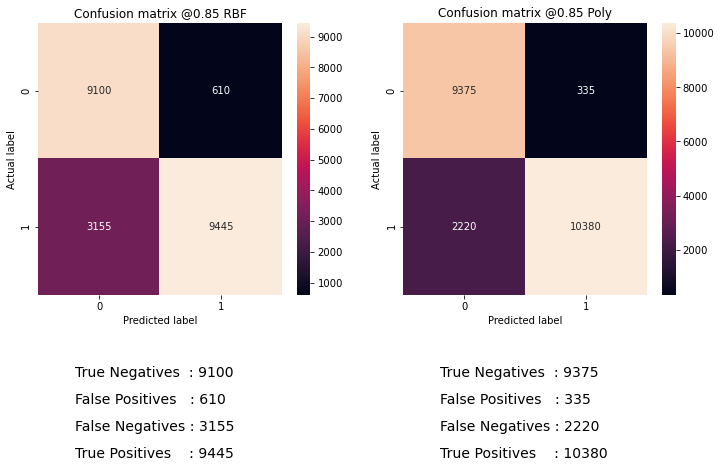

In [15]:
plot_cm(Y_test, predictions,kernel_names)

In [16]:
print('RBF Kernel Classification Report')
print(classification_report(Y_test, test_predictions))
print('\n')
print('Poly Kernel Classification Report')
print(classification_report(Y_test, test_predictions_poly))

RBF Kernel Classification Report
              precision    recall  f1-score   support

           0       0.74      0.94      0.83      9710
           1       0.94      0.75      0.83     12600

    accuracy                           0.83     22310
   macro avg       0.84      0.84      0.83     22310
weighted avg       0.85      0.83      0.83     22310



Poly Kernel Classification Report
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      9710
           1       0.97      0.82      0.89     12600

    accuracy                           0.89     22310
   macro avg       0.89      0.89      0.89     22310
weighted avg       0.90      0.89      0.89     22310

